Text(0,0.5,'Feature 1')

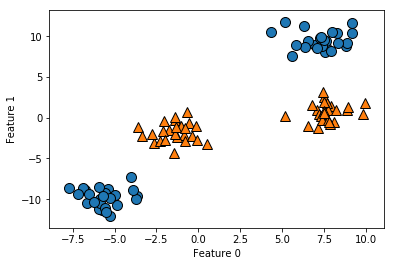

In [2]:
%matplotlib inline
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X,y = make_blobs(centers  = 4, random_state=8)
# print(y)
y = y % 2
# print(y)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

/home/minzhang/anaconda2/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0,0.5,'Feature 1')

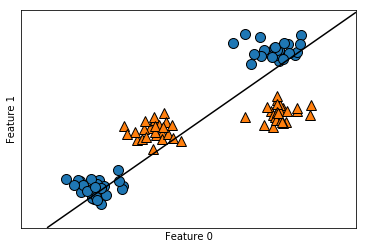

In [3]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
# print(X)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')



[False  True False False False  True  True False False False  True  True
 False False False  True  True False False  True  True False  True  True
 False  True  True False  True False False False False False  True  True
 False  True False  True False False  True  True  True  True False  True
 False False False  True  True  True False  True  True  True  True False
 False  True False  True  True False False False  True  True False  True
  True False  True  True False  True False False  True  True False  True
 False  True  True  True  True False False  True False  True  True False
 False False False False]
[ True False  True  True  True False False  True  True  True False False
  True  True  True False False  True  True False False  True False False
  True False False  True False  True  True  True  True  True False False
  True False  True False  True  True False False False False  True False
  True  True  True False False False  True False False False False  True
  True False  True False 

Text(0.5,0,'feature1 **2')

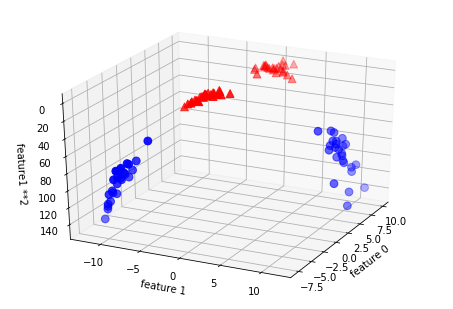

In [5]:
X_new = np.hstack([X, X[:,1:] **2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
mask=y == 0
# print(X_new.shape)
# print(mask)
# print(X_new[mask,0])
# print(X_new)
ax.scatter(X_new[mask, 0], X_new[mask,1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask,1], X_new[~mask, 2], c='r',marker = '^' ,cmap=mglearn.cm2, s=60)
# print(~mask)
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature1 **2')

/home/minzhang/anaconda2/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3


Text(0.5,0,'feature1 **2')

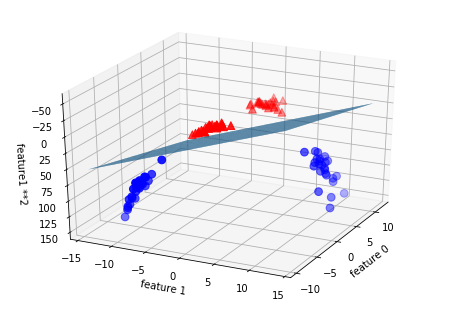

In [29]:
linear_scm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_scm_3d.coef_.ravel(),linear_scm_3d.intercept_
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim = -26)
xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2)
yy= np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2)
XX,YY = np.meshgrid(xx,yy)
# print(coef[0])
# print(coef[2])
ZZ = (coef[0]*XX +coef[1]*YY +intercept) / -coef[2]
# print(len(coef))
ax.plot_surface(XX,YY,ZZ)
ax.scatter(X_new[mask, 0], X_new[mask,1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask,1], X_new[~mask, 2], c='r',marker = '^' ,cmap=mglearn.cm2, s=60)
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature1 **2')


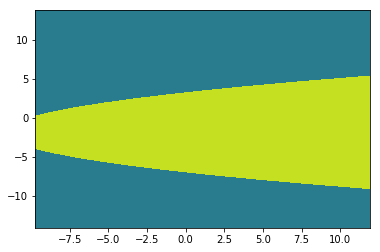

In [30]:
ZZ = YY ** 2
dec = linear_scm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape), levels = [dec.min(),0, dec.max()],cmap)